In [1]:
import matplotlib.pyplot as plt #For Visualization              
from sklearn.metrics import accuracy_score        

In [2]:
#Define Directories for train, test & Validation Set
train_path = './data/train'
test_path = './data/test'
valid_path = './data/validation'

In [3]:
#Define some often used standard parameters
#The batch refers to the number of training examples utilized in one #iteration
batch_size = 256 
#The dimension of the images we are going to define is 500x500 img_height = 500
img_width = 128
img_height = 128

In [4]:
from keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(rescale=1./255)

train = image_gen.flow_from_directory(train_path,
      target_size=(img_height, img_width), 
      shuffle=False,
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False, 
      class_mode='binary',
      batch_size=batch_size
      )

valid_data_gen = ImageDataGenerator(rescale = 1./255)
valid = valid_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary', 
      batch_size=batch_size,
      shuffle=False,
      )

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
cnn = Sequential()
cnn.add(Conv2D(16, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])                 

In [6]:
cnn.fit(train, validation_data=valid, epochs=5)

Epoch 1/5
7/7 [==============================] - 4s 517ms/step - loss: 2.6926 - accuracy: 0.6029 - val_loss: 0.6682 - val_accuracy: 0.5000
Epoch 2/5
7/7 [==============================] - 3s 476ms/step - loss: 1.2777 - accuracy: 0.3444 - val_loss: 0.7048 - val_accuracy: 0.5000
Epoch 3/5
7/7 [==============================] - 3s 457ms/step - loss: 0.4467 - accuracy: 0.7518 - val_loss: 0.7870 - val_accuracy: 0.5444
Epoch 4/5
7/7 [==============================] - 3s 476ms/step - loss: 0.7375 - accuracy: 0.5715 - val_loss: 0.3563 - val_accuracy: 0.9056
Epoch 5/5
7/7 [==============================] - 4s 484ms/step - loss: 0.3602 - accuracy: 0.8954 - val_loss: 0.2577 - val_accuracy: 0.9167


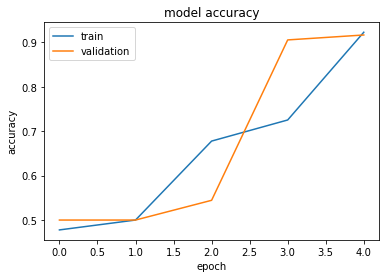

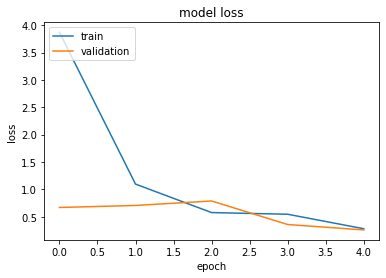

In [7]:
# plot accuracy
plt.figure()
plt.plot(cnn.history.history['accuracy'])
plt.plot(cnn.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# plot  loss
plt.figure()
plt.plot(cnn.history.history['loss'])
plt.plot(cnn.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
preds = cnn.predict(test)
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1
from sklearn.metrics import classification_report,confusion_matrix
acc=accuracy_score(test.classes, predictions)
cm = confusion_matrix(test.classes, predictions)
tn, fp, fn, tp = cm.ravel()
print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))


TEST METRICS ----------------------
Accuracy: 0.93%
Precision: 92.15686274509804%
Recall: 94.0%
F1-score: 93.06930693069306


              precision    recall  f1-score   support

       covid       0.94      0.92      0.93       100
      normal       0.92      0.94      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



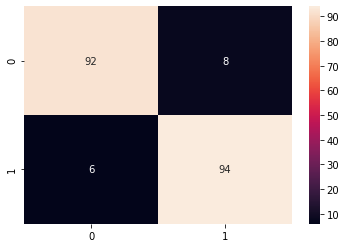

In [9]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['covid','normal']))
